# Data Processing

This notebook reads in all files from data/raw_data (excluding those in data/utils_data/file_ignore_list.txt) and processes them according to process_csv from data_functions.py into a dictionary (dataframes) which holds each time series.

There is room for individual exploratory analysis of the dfs in the dataframes dictionary.

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import glob

import importlib
import data_functions

importlib.reload(data_functions)
from data_functions import process_csv, plot_dataframe, remove_capitals

raw_path = "../data/raw_data/"
processed_path = "../data/processed_data/"
data_utils_path = "../data/utils_data/"

In [2]:
# This list includes the all_data dfs and datasets that were collected in the initial sweep,
# but have data that ends early and/or datetime frequencies that are not monthly
ignore_list = open(data_utils_path + "file_ignore_list.txt", "r").read().split()

## Data Uploading and Updating

Updating the processed data and concatenating into all_dfs

In [3]:
dataframes = {}
all_files = sorted(os.listdir(raw_path))

csv_files = [f for f in all_files if f not in ignore_list]
date_range = pd.date_range(start="1986-01-01", end="2024-09-01", freq="MS")

for file in csv_files:
    file_name = file[:-4]  # i.e. STATSCAN_energy
    var_name = remove_capitals(file_name)[1:]  # i.e. energy
    

    # processing all the data and uploading anything new
    print(file_name)
    dataframes[var_name] = process_csv(file_name, processed_path)

    # adding the original name before the inner column names
    col_names = []
    df_cols = list(dataframes[var_name].columns)
    for col in df_cols:
        col_names.append(var_name + ": " + col)

    dataframes[var_name].columns = col_names

    dataframes[var_name].index = pd.to_datetime(dataframes[var_name].index)
    dataframes[var_name] = dataframes[var_name].reindex(date_range)
    


all_df = pd.concat(dataframes.values(), axis=1)


CDEC_swe_nc
CDEC_swe_nl
CDEC_swe_sj
CDEC_swe_sl
CDEC_swe_sr
CDEC_swe_tl
EPU_policy_uncertainty
FRED_apu000072610
FRED_ces0500000011
FRED_cwur0000sa0
FRED_excaus
FRED_fedfunds
FRED_fmpi
FRED_impca
FRED_impch
FRED_impmx
FRED_irltlt01cam156n
FRED_paynsa
FRED_pcu324191324191
FRED_pcu325311325311
FRED_pcu32533253
FRED_pcu333132333132
FRED_pcu482111482111
FRED_pcuatransatrans
FRED_recprousm156n
FRED_unratensa
FRED_wtisplc
GT_avian_flu
GT_avian_influenza
GT_bills
GT_bird_flu
GT_credit
GT_diet
GT_exchange_rate
GT_flu
GT_food_bank
GT_food_shortage
GT_free_food
GT_free_meal
GT_gdp
GT_healthy_diet
GT_inflation
GT_jobs
GT_junk_food
GT_loan
GT_organic_food
GT_war
NCEI_pdsi
NOAA_enso
NYFED_gscpi
STATSCAN_ag_gdp
STATSCAN_canola_oil
STATSCAN_days_not_worked
STATSCAN_energy_cpi
STATSCAN_food_cpi
STATSCAN_food_cpi_FAIL
STATSCAN_fppi
STATSCAN_milk_sold
STATSCAN_monthly_retail_trade
STATSCAN_num_work_stop
STATSCAN_rail_gdp
STATSCAN_rail_pi
STATSCAN_retail_gdp
STATSCAN_rmpi
STATSCAN_tpi
STATSCAN_truck_gdp


# We are having issues with a few of the time series so we need to check pre-processing

### SWE - filter to only include SJ (San Joaquin) 
Should include STATION_ID = SDF,SLT,STM,BLA,MED,ADM,SNM,LLP,HRK,MDW,RCC,SSM,LOS,CAP,FRN,SIL,HYS,GKS,BLC


### SWE-sr (Sacremento River ) as suggested by Cody
Should include STATION_ID = BLK,DDM,GNL,REL,SLM,BLD,BLS,TES,DAN,SLI,TUM,HRS,WHW,PDS,KIB,STR,TNY,GIN,VLC,AGP,KSP,GRM,DPO,TMR,CHM,HNT,GRV,PSR


In [4]:
#keep only necessary columns
columns_to_drop = []

series_to_keep = ['swe_sr: SWE', 'swe_sj: SWE']
for column in all_df.columns:
    if 'swe' in column:
        if column not in series_to_keep:  # Check if the column is not in the keep list
            print(f"Dropping column: {column}")  # Print which column will be dropped
            columns_to_drop.append(column)  # Add to drop list


all_df = all_df.drop(columns=columns_to_drop)
all_df
        


Dropping column: swe_nc: SWE
Dropping column: swe_nl: SWE
Dropping column: swe_sl: SWE
Dropping column: swe_tl: SWE


,swe_sj: SWE,swe_sr: SWE,policy_uncertainty: Canada News-Based Policy Uncertainty Index,apu000072610: APU000072610,ces0500000011: CES0500000011,cwur0000sa0: CWUR0000SA0,excaus: EXCAUS,fedfunds: FEDFUNDS,fmpi: PCU311311,impca: IMPCA,...,commodity_price_index: FATS_OILS,commodity_price_index: GRAINS,commodity_price_index: OTHERFOOD,commodity_price_index: RAW_MATERIAL,commodity_price_index: TIMBER,commodity_price_index: OTHERRAWMAT,commodity_price_index: FERTILIZERS,commodity_price_index: METMIN,commodity_price_index: BASEMET,commodity_price_index: PRECIOUSMET
1986-01-01,10.753226,14.725986,91.105314,0.081,NaN,108.900,1.4070,NaN,99.800,5680.700000,...,43.90,53.49,42.38,41.00,42.52,39.34,30.05,28.20,30.57,28.46
1986-02-01,18.899366,26.887587,96.968702,0.075,NaN,108.500,1.4043,NaN,99.200,5659.500000,...,40.42,51.66,44.31,42.09,43.24,40.83,29.26,27.99,30.32,27.80
1986-03-01,23.348971,39.425513,86.906782,0.075,NaN,107.900,1.4009,NaN,99.000,5922.900000,...,39.30,50.81,48.52,41.13,41.96,40.21,29.52,28.87,31.39,28.08
1986-04-01,16.509811,38.585833,69.223383,0.074,NaN,107.600,1.3879,NaN,98.600,5821.100000,...,38.32,49.90,50.99,39.79,40.85,38.64,28.63,28.62,31.09,27.35
1986-05-01,10.428860,25.978136,93.354333,0.074,NaN,107.900,1.3757,NaN,99.300,5922.500000,...,37.96,49.04,47.12,40.42,42.57,38.07,27.89,28.63,31.10,27.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,20.660710,14.939886,248.883113,0.175,1197.07,308.163,1.3667,5.33,257.218,35669.381089,...,106.75,119.29,131.97,76.86,78.39,75.20,108.45,116.64,124.80,178.99
2024-06-01,2.536432,0.934703,195.109713,0.178,1200.50,308.054,1.3705,5.33,258.949,34393.224478,...,107.00,115.64,125.32,77.03,78.62,75.29,118.20,110.62,119.21,177.56
2024-07-01,1.010973,0.523842,223.075369,0.178,1199.39,308.501,1.3714,5.33,260.250,35798.948016,...,107.81,109.08,126.19,80.58,79.35,81.94,120.34,106.84,114.64,182.29
2024-08-01,0.981405,0.329099,295.164116,0.177,1208.39,308.640,1.3655,5.33,259.876,33036.375028,...,102.35,106.34,127.40,78.25,80.90,75.35,120.02,103.50,111.63,185.63


# Save the processed dataframe 

In [5]:
all_df.to_csv(os.path.join(processed_path, "all_data_processed.csv"), index=True)
all_df

,swe_sj: SWE,swe_sr: SWE,policy_uncertainty: Canada News-Based Policy Uncertainty Index,apu000072610: APU000072610,ces0500000011: CES0500000011,cwur0000sa0: CWUR0000SA0,excaus: EXCAUS,fedfunds: FEDFUNDS,fmpi: PCU311311,impca: IMPCA,...,commodity_price_index: FATS_OILS,commodity_price_index: GRAINS,commodity_price_index: OTHERFOOD,commodity_price_index: RAW_MATERIAL,commodity_price_index: TIMBER,commodity_price_index: OTHERRAWMAT,commodity_price_index: FERTILIZERS,commodity_price_index: METMIN,commodity_price_index: BASEMET,commodity_price_index: PRECIOUSMET
1986-01-01,10.753226,14.725986,91.105314,0.081,NaN,108.900,1.4070,NaN,99.800,5680.700000,...,43.90,53.49,42.38,41.00,42.52,39.34,30.05,28.20,30.57,28.46
1986-02-01,18.899366,26.887587,96.968702,0.075,NaN,108.500,1.4043,NaN,99.200,5659.500000,...,40.42,51.66,44.31,42.09,43.24,40.83,29.26,27.99,30.32,27.80
1986-03-01,23.348971,39.425513,86.906782,0.075,NaN,107.900,1.4009,NaN,99.000,5922.900000,...,39.30,50.81,48.52,41.13,41.96,40.21,29.52,28.87,31.39,28.08
1986-04-01,16.509811,38.585833,69.223383,0.074,NaN,107.600,1.3879,NaN,98.600,5821.100000,...,38.32,49.90,50.99,39.79,40.85,38.64,28.63,28.62,31.09,27.35
1986-05-01,10.428860,25.978136,93.354333,0.074,NaN,107.900,1.3757,NaN,99.300,5922.500000,...,37.96,49.04,47.12,40.42,42.57,38.07,27.89,28.63,31.10,27.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,20.660710,14.939886,248.883113,0.175,1197.07,308.163,1.3667,5.33,257.218,35669.381089,...,106.75,119.29,131.97,76.86,78.39,75.20,108.45,116.64,124.80,178.99
2024-06-01,2.536432,0.934703,195.109713,0.178,1200.50,308.054,1.3705,5.33,258.949,34393.224478,...,107.00,115.64,125.32,77.03,78.62,75.29,118.20,110.62,119.21,177.56
2024-07-01,1.010973,0.523842,223.075369,0.178,1199.39,308.501,1.3714,5.33,260.250,35798.948016,...,107.81,109.08,126.19,80.58,79.35,81.94,120.34,106.84,114.64,182.29
2024-08-01,0.981405,0.329099,295.164116,0.177,1208.39,308.640,1.3655,5.33,259.876,33036.375028,...,102.35,106.34,127.40,78.25,80.90,75.35,120.02,103.50,111.63,185.63


## Exploration of individual dataframes

<AxesSubplot:>

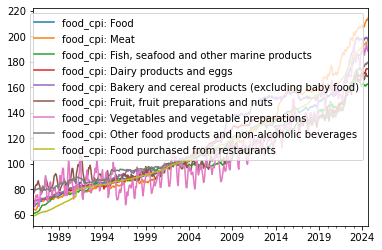

In [6]:
(dataframes['food_cpi']).plot()